In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")
df.head()

,Timestamp,Open,High,Low,Close,Volume
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6750281 entries, 0 to 6750280
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   Timestamp  float64
 1   Open       float64
 2   High       float64
 3   Low        float64
 4   Close      float64
 5   Volume     float64
dtypes: float64(6)
memory usage: 309.0 MB


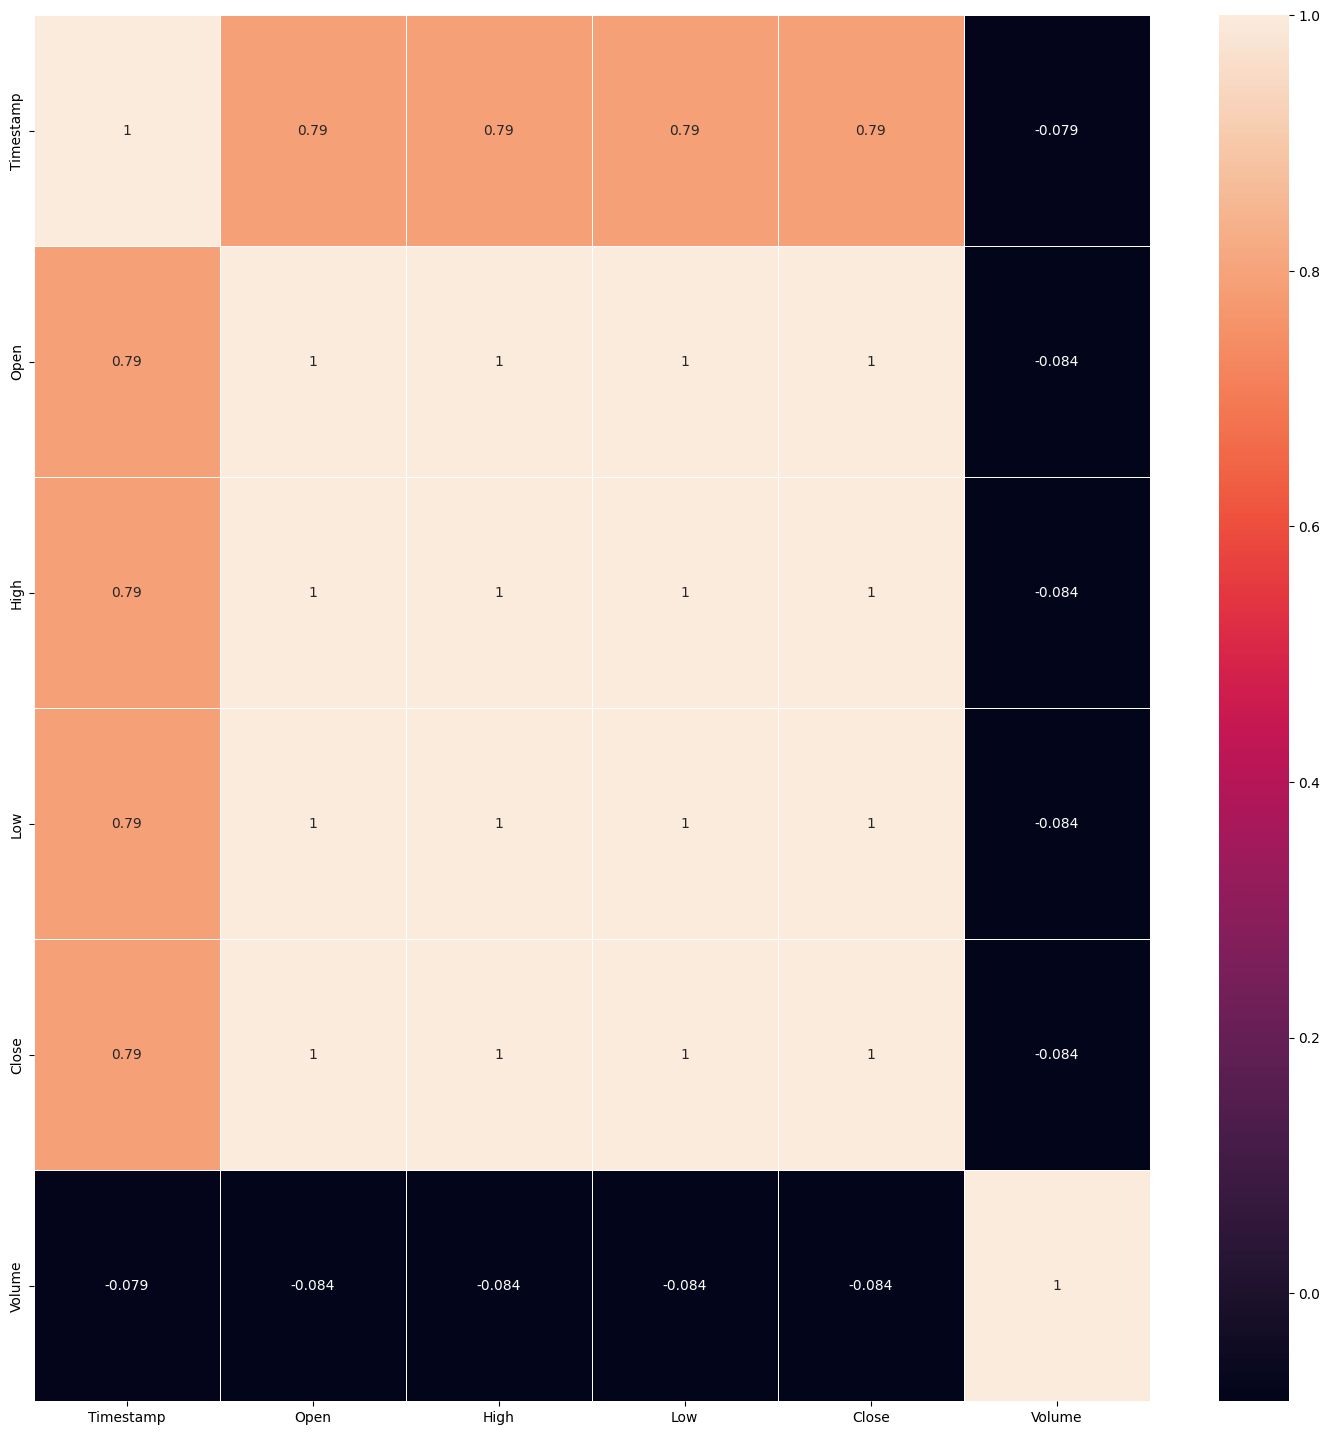

In [4]:
#correlation map
f,ax = plt.subplots(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, annot_kws={'fontsize': 10}, ax=ax)
plt.show()

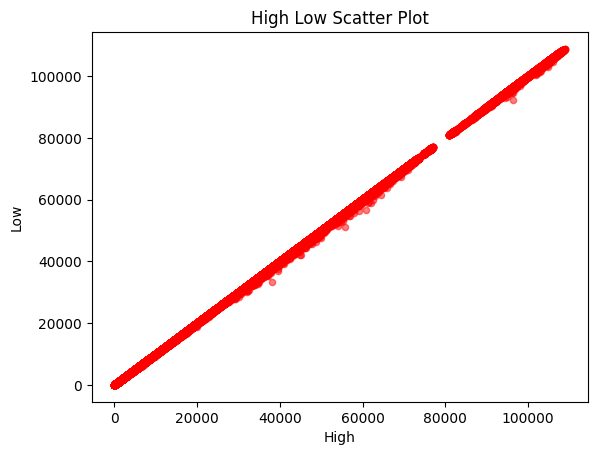

In [5]:
# Scatter Plot
df.plot(kind='scatter', x='High',y='Low',alpha = 0.5,color = 'red')
plt.xlabel('High')
plt.ylabel('Low')
plt.title('High Low Scatter Plot')
plt.show()

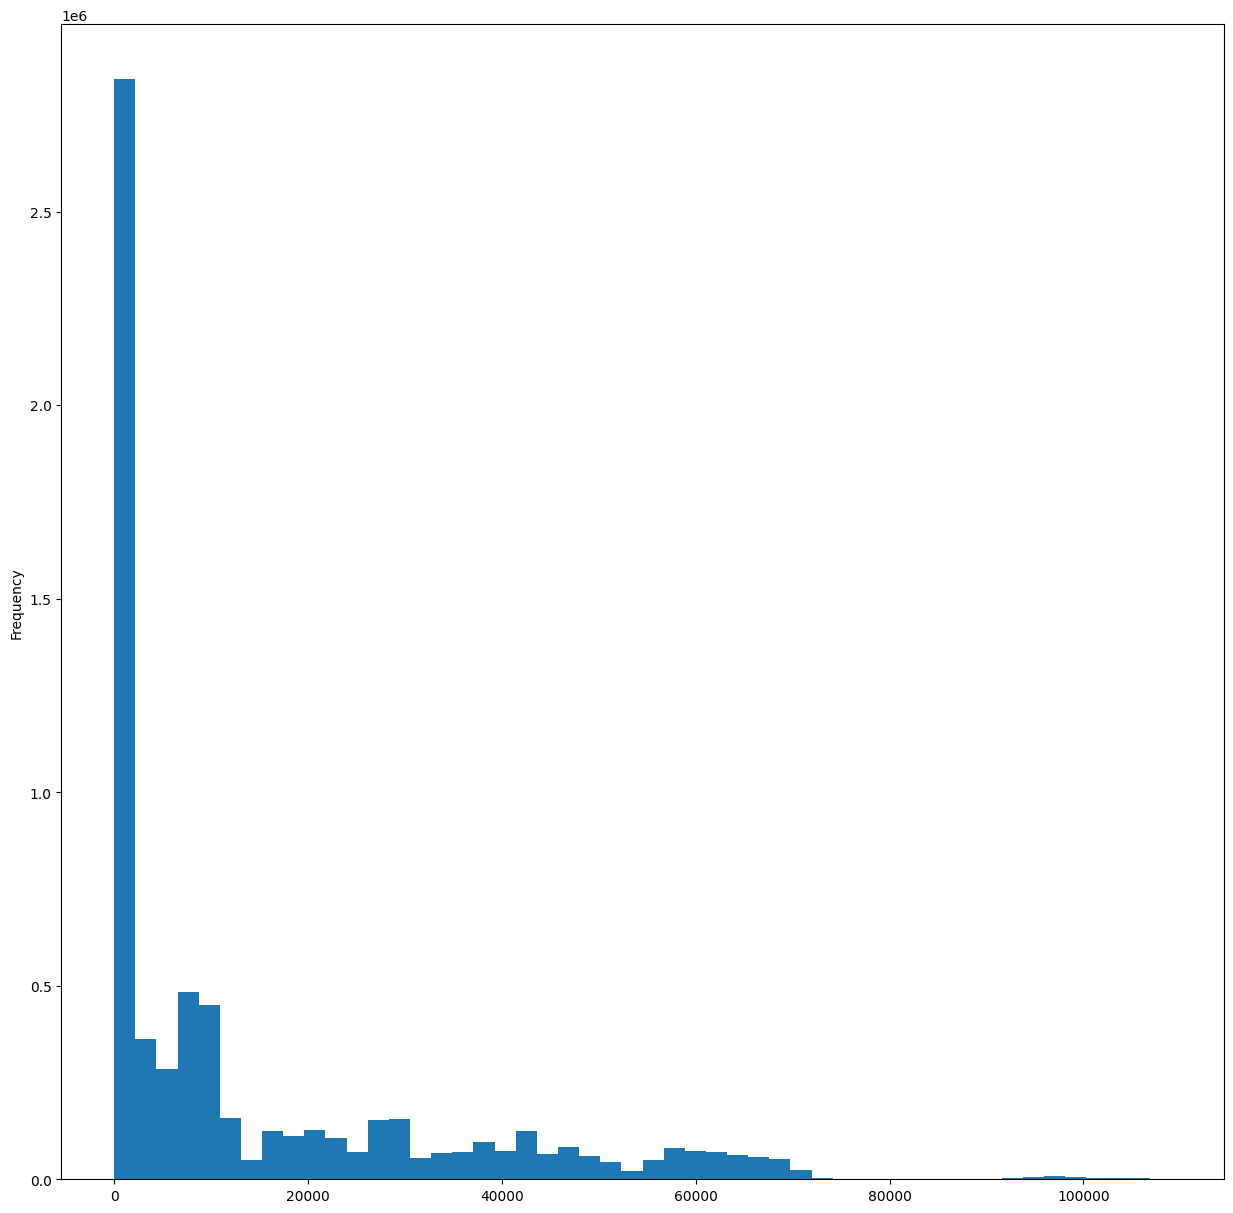

In [6]:
# Histogram
df.High.plot(kind = 'hist', bins = 50,figsize = (15,15))
plt.show()

In [7]:
# NaN, inf veya -inf değerleri kontrol et
print(df.isna().sum())  # NaN değerlerin sayısını kontrol et
print((df == float('inf')).sum())  # inf değerleri kontrol et
print((df == float('-inf')).sum())  # -inf değerleri kontrol et


Timestamp    1
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64
Timestamp    0
Open         0
High         0
Low          0
Close        0
Volume       0
dtype: int64


Check NaN and inf values

In [8]:
# NaN değerleri doldur
df = df.fillna(0)

# inf ve -inf değerleri NaN ile değiştir
df = df.replace([float('inf'), float('-inf')], float('nan'))

# Tüm NaN değerleri temizle veya doldur
df = df.dropna()  # Tamamen siler
# Veya doldur
df = df.fillna(0)


In [9]:
# Filtering Pandas data frame
x = df['High']>200
df[x]

,Timestamp,Open,High,Low,Close,Volume
668433,1.365522e+09,200.34,200.80,200.34,200.34,5.380000
668434,1.365522e+09,200.34,200.80,200.34,200.80,4.278005
668435,1.365522e+09,200.80,200.80,200.80,200.80,2.402750
668436,1.365522e+09,200.80,200.98,200.80,200.98,2.350603
668437,1.365522e+09,201.00,201.00,201.00,201.00,7.350000
...,...,...,...,...,...,...
6750276,1.737936e+09,102628.00,102669.00,102608.00,102611.00,0.086742
6750277,1.737936e+09,102659.00,102712.00,102657.00,102712.00,0.488757
6750278,1.737936e+09,102631.00,102631.00,102573.00,102573.00,0.126719
6750279,1.737936e+09,102573.00,102604.00,102507.00,102514.00,0.474495


In [10]:
# Filtering pandas with logical_and
df[np.logical_and(df['High']>200,df['Low']>100)]

,Timestamp,Open,High,Low,Close,Volume
668433,1.365522e+09,200.34,200.80,200.34,200.34,5.380000
668434,1.365522e+09,200.34,200.80,200.34,200.80,4.278005
668435,1.365522e+09,200.80,200.80,200.80,200.80,2.402750
668436,1.365522e+09,200.80,200.98,200.80,200.98,2.350603
668437,1.365522e+09,201.00,201.00,201.00,201.00,7.350000
...,...,...,...,...,...,...
6750276,1.737936e+09,102628.00,102669.00,102608.00,102611.00,0.086742
6750277,1.737936e+09,102659.00,102712.00,102657.00,102712.00,0.488757
6750278,1.737936e+09,102631.00,102631.00,102573.00,102573.00,0.126719
6750279,1.737936e+09,102573.00,102604.00,102507.00,102514.00,0.474495


# Dictionary
why we need dictionary?
1. faster than lists
2. it has key and value

In [11]:
dictionary = {'spain': 'madrid', 'usa':'vegas'}
print(dictionary.keys())
print(dictionary.values())

dict_keys(['spain', 'usa'])
dict_values(['madrid', 'vegas'])


In [12]:
dictionary['spain'] ="barcelona"     #update existing entry
print(dictionary)
dictionary['france'] = "paris"       #add new entr
print(dictionary)
del dictionary['spain']             # remove entr with key spain
print(dictionary)
print("france"in dictionary)        #check include or not
dictionary.clear()
print(dictionary)


{'spain': 'barcelona', 'usa': 'vegas'}
{'spain': 'barcelona', 'usa': 'vegas', 'france': 'paris'}
{'usa': 'vegas', 'france': 'paris'}
True
{}


# while and for loops


In [13]:
#stay in loop if condiiton (i is not equal 5) is true
i = 0
while i !=5 :
    print('i is:',i)
    i +=1
    print(i,'is equal to 5')

i is: 0
1 is equal to 5
i is: 1
2 is equal to 5
i is: 2
3 is equal to 5
i is: 3
4 is equal to 5
i is: 4
5 is equal to 5


In [14]:
#stay in loop if condiiton (i is not equal 5) is true
lis = [1,2,3,4,5]
for i in lis:
    print('i is:',i)
print('')

#enumarte index and value of list
#index : value = 0:1, 1:2, 2:3, 3:4, 4:5
for index, value in enumerate(lis):
    print(index,":",value)
print('')

# for dictionaries
dictionary = {'spain': 'madrid', 'france': 'paris'}
for key,value in dictionary.items():
    print(key,":",value)
print('')



i is: 1
i is: 2
i is: 3
i is: 4
i is: 5

0 : 1
1 : 2
2 : 3
3 : 4
4 : 5

spain : madrid
france : paris



# nested function

function inside function

In [15]:
#nested function
def square():
    """Return square of a value"""
    def add():
        """Add two local variables"""
        x = 2
        y = 3
        z = x + y
        return z 
    return add()**2  

print(square())  


25


# lambda function

faster way of writing function


In [16]:
#user defined function (long way)
def square(x):
    return x**2
print(square(5))  

# lambda function (short way)
square = lambda x: x**2  
print(square(5))  
tot = lambda x, y, z: x + y + z
print(tot(1, 2, 3))  


25
25
6


# anonymous function

like lambda function but it can take more than one arguments.

In [17]:
number_list = [1, 2, 3]
y = map(lambda x: x**2, number_list)
print(list(y))  


[1, 4, 9]


# iterators
1. iterable is an object that can return an iterator
2. iterable an object with an associated iter() method
3. iterator produces next value with nexy() method

In [18]:
# iteration example
name = "bedirhan"
it = iter(name)
print(next(it))
print(*it)

b
e d i r h a n


zip(): zip list

In [19]:
#zip example
list1 =[1,2,3,4]
list2 =[5,6,7,8]
z = zip(list1,list2)
print(z)
z_list = list(z)
print(z_list)

[(1, 5), (2, 6), (3, 7), (4, 8)]


In [20]:
un_zip = zip(*z_list)
un_list1, un_list2 = list(un_zip)
print(un_list1)
print(un_list2)
print(type(un_list2))


(1, 2, 3, 4)
(5, 6, 7, 8)
<class 'tuple'>


# List Comprehension

list comprehension: collapse for loops for building lists into a single line


In [21]:
num1 = [1,2,3]
num2 = [i + 1 for i in num1]
print(num2)


[2, 3, 4]


[i+1 for i in num1:]: list of comprehension

i+1: list comprehension syntax

for i in num1: for loop syntax

i: iterator

num1: iterable object

In [22]:
#conditionals on iterable
num1 = [5,10,15]
num2 = [i**2 if i == 10 else i-5 if i < 7 else i+5 for i in num1]
print(num2)

[0, 100, 20]


In [23]:
threshold = sum(df.Open)/len(df.Open)
print("threshold", threshold)
df["open_level"] = ["high" if i > threshold else "low" for i in df.Open]
df.loc[:10,["open_level","Open"]]


threshold 14723.928199509322


,open_level,Open
0,low,4.58
1,low,4.58
2,low,4.58
3,low,4.58
4,low,4.58
5,low,4.58
6,low,4.58
7,low,4.58
8,low,4.58
9,low,4.58


# Exploratory Data Analysis (EDA)

value_counts(): Frequency counts

outliers: the value that is considerably higher or lower from rest od the data


In [24]:
df.describe()

,Timestamp,Open,High,Low,Close,Volume
count,6.750281e+06,6.750281e+06,6.750281e+06,6.750281e+06,6.750281e+06,6.750281e+06
mean,1.527980e+09,1.472393e+04,1.473025e+04,1.471742e+04,1.472395e+04,5.456467e+00
std,1.169987e+08,2.003521e+04,2.004282e+04,2.002745e+04,2.003528e+04,2.292006e+01
min,0.000000e+00,3.800000e+00,3.800000e+00,3.800000e+00,3.800000e+00,0.000000e+00
25%,1.426677e+09,4.139000e+02,4.139900e+02,4.137100e+02,4.138900e+02,1.831179e-02
50%,1.527942e+09,6.275300e+03,6.278340e+03,6.272300e+03,6.275220e+03,5.000000e-01
75%,1.629207e+09,2.327390e+04,2.328292e+04,2.326500e+04,2.327400e+04,3.173070e+00
max,1.737936e+09,1.089460e+05,1.090300e+05,1.087760e+05,1.089600e+05,5.853852e+03


In [25]:
print(df['High'].value_counts(dropna = False))

High
5.00         7988
5.07         6997
276.80       6576
5.08         6134
4.91         5956
             ... 
18041.57        1
18070.87        1
18060.07        1
18044.59        1
102631.00       1
Name: count, Length: 1677644, dtype: int64


# Tidy Data

In [26]:
data_new = df.head()
data_new

,Timestamp,Open,High,Low,Close,Volume,open_level
0,1.325412e+09,4.58,4.58,4.58,4.58,0.0,low
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,low
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,low
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,low
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,low


In [27]:
melted = pd.melt(frame=data_new,id_vars = 'Timestamp', value_vars = ['High', 'Low'])
melted

,Timestamp,variable,value
0,1.325412e+09,High,4.58
1,1.325412e+09,High,4.58
2,1.325412e+09,High,4.58
3,1.325412e+09,High,4.58
4,1.325412e+09,High,4.58
5,1.325412e+09,Low,4.58
6,1.325412e+09,Low,4.58
7,1.325412e+09,Low,4.58
8,1.325412e+09,Low,4.58
9,1.325412e+09,Low,4.58


Pivoting Data

In [28]:
melted.pivot(index = 'Timestamp',columns ='variable',values= 'value')

variable,High,Low
Timestamp,,
1.325412e+09,4.58,4.58
1.325412e+09,4.58,4.58
1.325412e+09,4.58,4.58
1.325412e+09,4.58,4.58
1.325412e+09,4.58,4.58


# Concatenating Data

In [29]:
data1 = df.head()
data2 = df.tail()
conc_data_row = pd.concat([data1,data2],axis =0, ignore_index =True)
conc_data_row

,Timestamp,Open,High,Low,Close,Volume,open_level
0,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,low
1,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,low
2,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,low
3,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,low
4,1.325412e+09,4.58,4.58,4.58,4.58,0.000000,low
5,1.737936e+09,102628.00,102669.00,102608.00,102611.00,0.086742,high
6,1.737936e+09,102659.00,102712.00,102657.00,102712.00,0.488757,high
7,1.737936e+09,102631.00,102631.00,102573.00,102573.00,0.126719,high
8,1.737936e+09,102573.00,102604.00,102507.00,102514.00,0.474495,high
9,0.000000e+00,57854.00,57864.00,57835.00,57835.00,1.353466,high


In [30]:
data1 = df['High'].head()
data2 = df['Low'].head()
conc_data_col = pd.concat([data1,data2],axis =1)
conc_data_col

,High,Low
0,4.58,4.58
1,4.58,4.58
2,4.58,4.58
3,4.58,4.58
4,4.58,4.58


# Data Types



In [31]:
df.dtypes

Timestamp     float64
Open          float64
High          float64
Low           float64
Close         float64
Volume        float64
open_level     object
dtype: object

In [32]:
df['Volume'] = df['Volume'].astype('int64')


change data types

In [33]:
df.dtypes

Timestamp     float64
Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
open_level     object
dtype: object

# Building Data Frames From Scratch

In [34]:
country = ["Spian","France"]
population = ["11","12"]
list_label = ["country","population"]
list_col = [country,population]
zipped = list(zip(list_label,list_col))
data_dict = dict(zipped)
df1 = pd.DataFrame(data_dict)
df1

,country,population
0,Spian,11
1,France,12


In [35]:
df1["capital"] =["madrid","paris"]
df1

,country,population,capital
0,Spian,11,madrid
1,France,12,paris


In [36]:
#broadcasting
df1["income"] = 0
df1

,country,population,capital,income
0,Spian,11,madrid,0
1,France,12,paris,0


# Visual Exploratory Data Analysis

<Axes: >

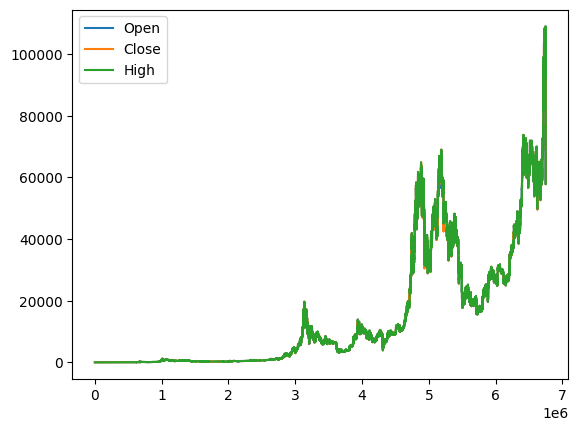

In [37]:
data1 = df.loc[:,["Open","Close","High"]]
data1.plot()

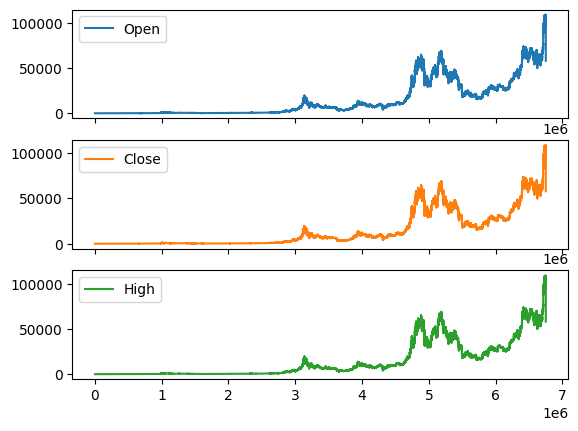

In [38]:
#subplots
data1.plot(subplots = True)
plt.show()

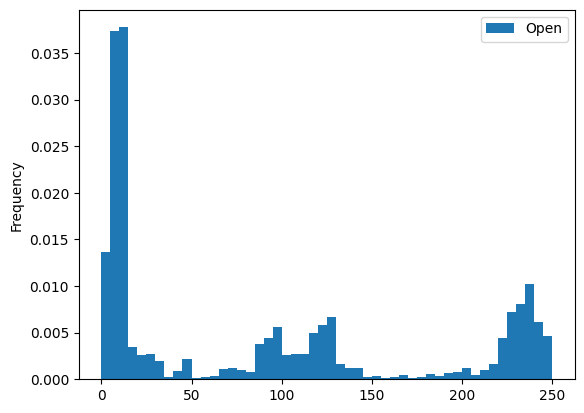

In [39]:
#scatter plot
data1.plot(kind="hist", y="Open", bins=50, range=(0, 250), density=True)

plt.show()

# Manipulating Data Frames with Pandas

**Indexing Data Frames**

In [40]:
data = pd.read_csv("/kaggle/input/bitcoin-historical-data/btcusd_1-min_data.csv")
data.index = range(1, len(data) + 1)  
data.index.name = "#"  
print(data.head())

      Timestamp  Open  High   Low  Close  Volume
#                                               
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
5  1.325412e+09  4.58  4.58  4.58   4.58     0.0


In [41]:
data["Open"][1]

4.58

In [42]:
data.loc[1,["Open"]]

Open    4.58
Name: 1, dtype: float64

**Slicing Data Frame**

In [43]:
print(type(data["Open"]))    #series
print(type(data[["Open"]]))  #data frame


<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [44]:
data.loc[1:10,"Open":"Close"]

,Open,High,Low,Close
#,,,,
1,4.58,4.58,4.58,4.58
2,4.58,4.58,4.58,4.58
3,4.58,4.58,4.58,4.58
4,4.58,4.58,4.58,4.58
5,4.58,4.58,4.58,4.58
6,4.58,4.58,4.58,4.58
7,4.58,4.58,4.58,4.58
8,4.58,4.58,4.58,4.58
9,4.58,4.58,4.58,4.58



# Filtering Data Frames

In [45]:
data = data.fillna(0)
boolean = data.Open >4.58
data[boolean]

,Timestamp,Open,High,Low,Close,Volume
#,,,,,,
628,1.325450e+09,4.84,4.84,4.84,4.84,10.000000
629,1.325450e+09,4.84,4.84,4.84,4.84,0.000000
630,1.325450e+09,4.84,4.84,4.84,4.84,0.000000
631,1.325450e+09,4.84,4.84,4.84,4.84,0.000000
632,1.325450e+09,4.84,4.84,4.84,4.84,0.000000
...,...,...,...,...,...,...
6750277,1.737936e+09,102628.00,102669.00,102608.00,102611.00,0.086742
6750278,1.737936e+09,102659.00,102712.00,102657.00,102712.00,0.488757
6750279,1.737936e+09,102631.00,102631.00,102573.00,102573.00,0.126719


In [46]:
data[data.Open<4]

,Timestamp,Open,High,Low,Close,Volume
#,,,,,,
37258,1.327647e+09,3.8,3.8,3.8,3.8,0.27
44045,1.328055e+09,3.8,3.8,3.8,3.8,5.00
44046,1.328055e+09,3.8,3.8,3.8,3.8,0.00
44047,1.328055e+09,3.8,3.8,3.8,3.8,0.00
44048,1.328055e+09,3.8,3.8,3.8,3.8,0.00
44049,1.328055e+09,3.8,3.8,3.8,3.8,0.00
44050,1.328055e+09,3.8,3.8,3.8,3.8,0.00


In [47]:
data.High[data.Open<4]

#
37258    3.8
44045    3.8
44046    3.8
44047    3.8
44048    3.8
44049    3.8
44050    3.8
Name: High, dtype: float64

# Transforming Data

In [48]:
def div(n):
  return n/2
data.Open.apply(div)


#
1              2.29
2              2.29
3              2.29
4              2.29
5              2.29
             ...   
6750277    51314.00
6750278    51329.50
6750279    51315.50
6750280    51286.50
6750281    28927.00
Name: Open, Length: 6750281, dtype: float64

In [49]:
data.Open.apply(lambda n: n/2)

#
1              2.29
2              2.29
3              2.29
4              2.29
5              2.29
             ...   
6750277    51314.00
6750278    51329.50
6750279    51315.50
6750280    51286.50
6750281    28927.00
Name: Open, Length: 6750281, dtype: float64

In [50]:
data["mean"] = (data.High + data.Low)/2
data.head()

,Timestamp,Open,High,Low,Close,Volume,mean
#,,,,,,,
1,1.325412e+09,4.58,4.58,4.58,4.58,0.0,4.58
2,1.325412e+09,4.58,4.58,4.58,4.58,0.0,4.58
3,1.325412e+09,4.58,4.58,4.58,4.58,0.0,4.58
4,1.325412e+09,4.58,4.58,4.58,4.58,0.0,4.58
5,1.325412e+09,4.58,4.58,4.58,4.58,0.0,4.58
